## Forest Fire Impact Prediction

Forest fires can be a friend and a foe. In the right place at the right time, forest fire can create many environmental benefits, such as reducing grass, brush, and trees that can fuel large and severe forest fires and improving wildlife habitat. In the wrong place at the wrong time, forest fires can wreak havoc, threatening lives, homes, communities, and natural and cultural resources.

In this project, our aim is to predict the burned area of forest fires, in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted.

This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

This program is designed to use geographical (Fire location), temporal (Month and Day), Fire Weather varibles () and weather variables (RH, Temp, Rain, Wind) to predict the area burned by forest fires. Data were obtained from the UCI Machine Learning database (http://archive.ics.uci.edu/ml/datasets/Forest+Fires) and contain details for 517 fires found in the Montesinho Natural Park in Portugal.

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.feature_selection import RFECV
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Unable to create process using 'C:\Users\Aparna Akula\anaconda3\python.exe "C:\Users\Aparna Akula\anaconda3\Scripts\pip-script.py" install mlxtend'


**Load and describe data**

In [3]:
forest_fires = pd.read_csv("forestfires.csv")

In [4]:
forest_fires.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Checking for Missing Values**

In [7]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
plt.rcParams["figure.figsize"] = 9,5

**Exploratory Data Analysis**

**1.Univariate Analysis**

Lets begin with the target variable as Area

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


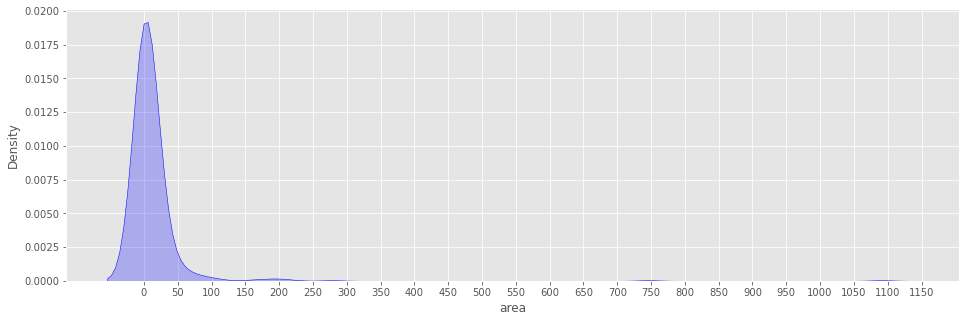

In [9]:
plt.figure(figsize=(16,5))
target = 'area'
print("Skew: {}".format(forest_fires[target].skew()))
print("Kurtosis: {}".format(forest_fires[target].kurtosis()))
ax = sns.kdeplot(forest_fires[target],shade=True,color='b')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

C:\Users\Aparna Akula\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


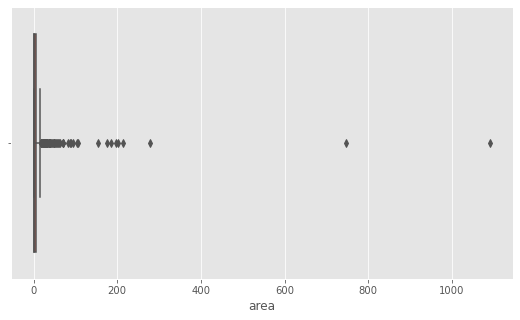

In [10]:
ax = sns.boxplot(forest_fires[target])

Observations:-
*   The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.
*   It also tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.
*   There are 4 outlier instances in our area  columns





In [11]:
#Outlier points based on area
area_outliers = forest_fires[abs(zscore(forest_fires[target])) >= 3]
area_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


There are 4 rows as outliers condisering with area

Independent Columns

In [12]:
forest_fires_new = forest_fires.drop(columns=target)
cat_columns = forest_fires_new.select_dtypes(include='object').
                                            columns.tolist()
num_columns = forest_fires_new.select_dtypes(exclude='object').
                                            columns.tolist()

cat_columns,num_columns

SyntaxError: invalid syntax (Temp/ipykernel_21576/3157660214.py, line 2)

Categorical Columns

In [ ]:
#analyzing categorical columns
#Number of ForesFires occured per month and day
plt.figure(figsize=(13,9))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forest_fires_new, y=col)
    plt.subplot(2,2,i+2)
    forest_fires[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

Observations:-
*   The highest number of fires occured in the month of August and September.
*   In case of days, sunday and fridays have more number of fires. 



Numerical Columns

In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest_fires[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    forest_fires[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = forest_fires[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],
                     index=['skewness','kurtosis'])

Observations:-
*   Skewness and Kurtosis (high positive and negative) was observed in the following columns:
  *   FFMC
  *   ISI
  *   Rain





**2.Bivariate Analysis on Target Variable**

In [ ]:
print(forest_fires['area'].describe(),'\n')
print(area_outliers)

In [ ]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"
forest_fires['damage_category'] = forest_fires['area'].
                                    apply(area_cat)
forest_fires.head()

adding a categorical variable called "damage_category" this is based on the area burnt. So if the burnt area is equal to zero it is categorized as "No damage", the burnt area is less than or equal to 1 it is "low", if the brunt area is less than or equal to 25 it is "moderate" and if the brunt area is less than or equal to 100 it is "high"

Categorical Columns

In [ ]:
cat_columns

In [ ]:
#Forestfire damage each month and each day
for col in cat_columns:
    cross = pd.crosstab(index=forest_fires['damage_category'],
                columns=forest_fires[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

Observations:-
* In the previous observations, we can see that highest number of fires are occured in the month of August and September. From the above plot of month, the below two are the things we can understand   
    * Most of the area for the fires occured in August is low less than 1 hectare
    * Also, we can infer that highest damage to the area is done in July, August and September that is more that 100 hectares
* Regarding the fire damage per day, there were no very high damaging fires on Friday and on Saturdays it has been reported the most.

Numerical Columns

In [ ]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=forest_fires,x=col,y=target,
                              hue='damage_category')
    else:
        sns.scatterplot(data=forest_fires,x=col,y=target,
                                hue='damage_category')
plt.show()

**3.Multivariate Analysis**

In [ ]:
selected_features = forest_fires.drop(columns=
        ['damage_category','day','month']).columns
selected_features

In [ ]:
sns.pairplot(forest_fires,hue='damage_category',
             vars=selected_features)
plt.show()

**Outlier Treatment**

We had observed outliers in the following columns:
area
FFMC
ISI
rain

In [ ]:
out_columns = ['area','FFMC','ISI','rain']

However, the above outliers are not error values so we cannot remove it.
In order to minimize the effect of outliers in our model we will transform the above features.

**Preparing the data for Modelling**

In [ ]:
#encoding categorical columns
df1_ff = pd.get_dummies(forest_fires,columns=
                ['day','month'],drop_first=True)

In [ ]:
#data transformations like log,root,inverse,exponential etc.,
print(df1_ff[out_columns].describe())
np.log1p(df1_ff[out_columns]).skew(),
        np.log1p(df1_ff[out_columns]).kurtosis()

In [ ]:
# FFMC and rain both have very high skew and kurtosis values, since we are using linear regression model we cannot operate with high such values
# so for FFMC we can remove the outliers in them using z-score method
mask = df1_ff.loc[:,['FFMC']].apply(zscore).abs()<3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df1_ff['rain'] = df1_ff['rain'].apply(lambda x: int(x > 0.0))

df1_ff = df1_ff[mask.values]
df1_ff.shape

In [ ]:
out_columns.remove('rain')
df1_ff[out_columns] = np.log1p(df1_ff[out_columns])
df1_ff[out_columns].skew()

In [ ]:
# we will use this dataframe for building our ML model
df_ml = df1_ff.drop(columns=['damage_category']).copy()

## Linear Regression

we will be working on Linear regression using both Statistical and Machine learning approach.

In [ ]:
X = df_ml.drop(columns=['area'])
y = df_ml['area']
head(df_ml)

## 1.Statistical Approach

Checking assumptions for linear regression in statistics

Linearity of model

Normality of residuals

Homoscedasticity

No Autocorrelation

Multicollinearity

In [ ]:
X_constant = sm.add_constant(X)

# Build OLS model
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

**1. Linearity of Residuals**
 - Linearity can be measured by two methods:-
     - Rainbow test
     - Plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.

In [ ]:
#Rainbow Test
import scipy.stats as stats
import pylab

# get an instance of Influence with influence and outlier measures 
st_resid = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_resid,dist="norm",plot=pylab)
plt.show()

- Null hypothesis (H0): The Null hypothesis is that the regression is correctly modeled as linear.
- Alternate hypothesis(H1): The model is non-linear

In [ ]:
# return fstat and p-value
sm.stats.diagnostic.linear_rainbow(lin_reg)

In [ ]:
# The mean expected value around 0, it implies linearity is preserved
lin_reg.resid.mean()

Linearity Test - Function for visually inspecting the assumption of linearity in a linear regression model.
                 It plots observed vs. predicted values and residuals vs. predicted values.    
    Args
    
    model - fitted OLS model from statsmodels
    y - observed values

In [ ]:
def linearity_test(model, y):   
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2,figsize=(15,5))

    sns.regplot(x=fitted_vals, y=y, lowess=True, 
                ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, 
                ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y) 
plt.tight_layout()

The desired outcome of plots is that points are symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter one.
- By observing the plots the linearity assumption is not there
- Adding new features might result in linearity of model
- Also, transforming the feature from non-linear to linear using various data transformation techniques can help.

**2.Normality of the Residuals**

In [ ]:
sns.distplot(lin_reg.resid,fit=stats.norm)
plt.text(4,0.5,f"Skewness: {round(lin_reg.resid.skew(),2)}",
                                             fontsize=15)
plt.show()

In [ ]:
sm.qqplot(lin_reg.resid,line ='r')
jb = [round(n,2) for n in stats.jarque_bera(lin_reg.resid)]
plt.text(-2,4,f"Jarque bera: {jb}",fontsize=15)
plt.show()

Test for normality: Jarque Bera

For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test, the lesser the residuals are normally distributed.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

Jarque-Bera (JB): 104.39

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.

Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

Our dataframe length, 517

Null hypothesis (H0) - Residuals are normally distributed

- The p-value is 0 which simply means we can reject out NULL hypothesis. We can fix that by
    - Removing the outliers in the data
    - Fixing the Non-linearity in our dependent or target feature
    - Removing the bias, the bias might be contributing to the non-normality.

**3.Homoscedasticity**

Homoscedacity: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious.

Heteroscedacity: If the residuals are not symmetric across the trend, then it is called as heteroscedacious.

Goldfeld-Quandt test for Homoscedasticity

H0 = constant variance among residuals (Homoscedacity)

Ha = Heteroscedacity.

In [ ]:
sms.het_goldfeldquandt(lin_reg.resid, lin_reg.model.exog)

In [ ]:
model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal

fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, 
            ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Predicted vs Residuals', fontsize=16)
ax[0].set(xlabel='Predicted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), 
            lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Predicted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
plt.tight_layout()

- To identify homoscedasticity in the plots, the placement of the points should be equally distributed, random, no pattern (increase/decrease in values of residuals) should be visible and a flat red line.
- In the plots we can see there are no paticular patterns and P-Values is also greater than 0.05 ,so we can say that there is homoscedasticity.
- Outliers can make it Heteroscedacious, Transforming (log or Box cox, if > 0) the dependent or independent variables can help fix it.

**4.No Autocorrelation**
Autocorrelation measures the relationship between a variable's current value and its past values.

Test for autocorrelation : Durbin- Watson Test

It's test statistic value ranges from 0-4. If the value is between
- 0-2, it's known as Positive Autocorrelation.
- 2-4, it is known as Negative autocorrelation.
- exactly 2, it means No Autocorrelation.

For a good linear model, it should have low or no autocorrelation.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lin_reg.resid)

In [ ]:
import statsmodels.tsa.api as smt
# Confidence intervals are drawn as a cone. 
# By default, this is set to a 95% confidence interval, 
# suggesting that correlation values outside of this code are very likely a correlation 
# and not a statistical fluke
acf = smt.graphics.plot_acf(lin_reg.resid, lags=50 , alpha=0.05)
acf.show()

- By observing the above data we can say that there is positive autocorrelation is present , we can reduce it by using fine tuning our parameters
- We can even use Generalize Least Squares (GLS) model

**5.Multicollinearity**

Multicollineariy arises when one independent variable can be linearly predicted by others with a substantial level of accuracy.

In [ ]:
plt.figure(figsize =(16,10))

sns.heatmap(df1_ff.corr(),annot=True,cmap='YlGnBu',fmt=".2f",cbar=False)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) 
                   for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).
            sort_values(by="vif",ascending=False)

There is multicollinearity present between some features where vif >5.
- We can even use PCA to reduce features to a smaller set of uncorrelated components.
- To deal with multicollinearity we should iteratively remove features with high values of VIF.

## 2.Machine Learning Approach

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

print(f'Intercept: {lr.intercept_}')
print(f'R^2 score: {lr.score(X, y)}')
pd.DataFrame({"Coefficients": lr.coef_}, index=X.columns)

**Improving Stats Model**

Dropping columns to improve accuracy:

By checking high Variance inflation factor and p-value we will decide whether to keep the column or drop it.

R^2 = 1 - SSE(Sum of Square of Residuals)/SST (Sum of square Total)

Just by dropping constant we got a huge bump in adjusted R2 from 2.5% to 40.6%.

In [ ]:
X = df1_ff.drop(columns=['area','damage_category'])
y = df1_ff['area']

In [ ]:
def check_stats(X,y):
    vif = [variance_inflation_factor(X.values, i) for
                               i in range(X.shape[1])]
    print(pd.DataFrame({'vif': vif}, index=X.columns).
              sort_values(by="vif",ascending=False)[:10])
    lin_reg = sm.OLS(y,X).fit()
    print(lin_reg.summary())
check_stats(X,y)

In [ ]:
# dropping FFMC, Y, month_jul, day_thu, day_mon, month_aug as P-value is high
X.drop(columns=['FFMC'],inplace=True)
X.drop(columns=['Y'],inplace=True)
X.drop(columns=['month_jul'],inplace=True)
X.drop(columns=['day_thu'],inplace=True)
X.drop(columns=['day_mon'],inplace=True)
X.drop(columns=['month_aug'],inplace=True)
check_stats(X,y)

Similarly, you can continue to optimize the model.

Our Prob (F-statistic) has improved from  7.32e-45 to 2.20e-48. As the value is less than 0.05, the model becomes more significant.

**Improving ML model**

Feature Selection techniques

The following can be used for selecting relevant features for model building

- Using Pearson Correlation
- Wrapper method
    - Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each       iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve         the performance of the model.
    - Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at       each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of       features.
    - Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature             subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It             constructs the next model with the left features until all the features are exhausted. It then ranks the features based on       the order of their elimination.
- Embedded method, lasso is one such method which penalizes features based on feature importance, making lesss important feature to 0.


In [ ]:
X_m, y_m = df_ml.drop(columns=[target]), df_ml[target]

Recursive Feature Elimination

In [ ]:
# RFECV is a variant with inbuilt Cross validation
model = LinearRegression()
selector = RFECV(model,cv=5)
selector = selector.fit(X_m, y_m)
print(f"Out of {len(X_m.columns)} features, 
      best number of features {selector.n_features_}")
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X_m.columns) + 1), selector.grid_scores_)
print(X_m.columns[selector.support_].values)
plt.show()

In [ ]:
# In our stats method we found that the intercept was not relevant 
# Let's try that feature out in our ML model
model = LinearRegression(fit_intercept=False)
selector = RFECV(model,cv=5)
selector = selector.fit(X_m, y_m)
print(f"Out of {len(X_m.columns)} features, 
      best number of features {selector.n_features_}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X_m.columns) + 1), selector.grid_scores_)
print(X_m.columns[selector.support_].values)
plt.show()

Building model with the best features and checking the R2 score for the same

In [ ]:
mask = selector.support_
print(f"Best features according to RFE {X_m.columns[mask].values}")

X_m1 = X_m.iloc[:,mask]
# We could have used train test split or cross validation strategies
# for scoring the model but in order to compare with the stats model 
# we will use the whole data
model1 = LinearRegression().fit(X_m1,y_m)
print(f"R2 Score: {model1.score(X_m1,y_m)}")

Forward Selection

In [ ]:
model = LinearRegression(fit_intercept=False)
sfs1 = sfs(model,k_features=20,forward=True,scoring='r2',cv=5)
sfs1.fit(X_m,y_m)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Forward Selection')
plt.grid()
plt.show()

In [ ]:
print(sfs1.k_features, sfs1.k_feature_names_,sep="\n")

In [ ]:
index = list(sfs1.k_feature_idx_)
X_m1 = X_m.iloc[:,index]
model1 = LinearRegression().fit(X_m1,y_m)
print(f"R2 Score: {model1.score(X_m1,y_m)}")

Backward Selection

In [ ]:
model = LinearRegression(fit_intercept=False)
sfs1 = sfs(model,k_features=6,forward=False,scoring='r2',cv=5)
sfs1.fit(X_m,y_m)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Backward Selection')
plt.grid(True)
plt.show()

In [ ]:
index = list(sfs1.k_feature_idx_)
print(f"Best features according to RFE: {X_m.columns[index]}")

X_m1 = X_m.iloc[:,index]
model1 = LinearRegression().fit(X_m1,y_m)
print(f"R2 Score: {model1.score(X_m1,y_m)}")

Overall Summary:-

- After doing Univariate Analysis as the target variable as Area, 
      - we can determine that the data is highly skewed and it has huge kurtosis value, 
      - also most of the damaged area is under 50 hectares of land for majority of the forest fires occured.
      - Skewness and Kurtosis was observed in FFMC, ISI and Rain

- The highest number of fires occured in the month of August and September.
- In case of days, sunday and fridays have more number of fires.

- Later to understand the data more I did a Bivariate Analysis, by adding a categorical variable called "damange_category"
      - the area brunt in August beacuse of forest fires is less than 1 hectare
	  - the area brunt in July, August and September is more that 100 hectare, this is where the highest damage is occured to           area
	  - there were no very high damaging fires on Friday and on Saturdays, so the area brunt is less	

- FFMC and rain both have very high skew and kurtosis values, since we are using linear regression model we cannot operate with high such values. So for FFMC we can remove the outliers in them using z-score method and rain is taken care by using lambda functions.

- I did Linear Regression using both statistical and machine learning approach, here I didnt train any databecause we are trying   to predict the burnt area with the existing columns itself.	
      - By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
	  - Hence, used 'add_constant' so that it also fits an intercept.
	  - R squared of the statistical model is 0.077 and F-statistic value is 1.489.

- Checking assumptions for linear regression in statistics.
1. Linearity of model:- used rainbow test and plotted observed values Vs predicted values, residual Vs predicted values.
    From the rainbow test the mean value is not around zero and through plots we can observe that the plots are not linear.
2. Normality of the Residuals:- Normality can be verified by conducting a Jarque Bera Test. 
                     The higher the value of Jarque Bera test, the lesser the residuals are normally distributed.
					 The value of Jarque-Bera test is 104.39, meaning the residuals are not normally distributed.
3. Homoscedasticity:- used Goldfeld-Quandt test for HomoscedasticityIn the plots we can see there are no paticular patterns and                      P-Values is also greater than 0.05, so we can say that there is homoscedasticity. 
4. No Autocorrelation:- Test for autocorrelation is by Durbin- Watson Test. With a value of 0.97 the model is considered to be in a positive autocorelation.
5. Multicollinearity:- Multicollinearity is calculated using VIF, the values with VIF greater than 5 are condidered to be multicollinear.

- R squared value using Machine Learning approach is 0.07

- Improved the stats model by dropping high Variance inflation factor and p-value columns.
  then the R squared value is 0.438 and F-statistic value is 13 which is considered to be very good model.

- Improved machine learning model by implementing wrappers methods,
    - using Recursive Feature Elimination - derived the 19 best features and R squared value is 0.055
    - using Forwrad Selection - 20 best features were derived with a R squared value of 0.054
    - using Backwrad Selection - 6 best features were derived with a R squared value of 0.018

- Hence the improved stats model is the best model.


Reference :-

https://www.datarobot.com/blog/ordinary-least-squares-in-python/
https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/
https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html
https://www.statology.org/durbin-watson-test-python/
https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
https://www.statology.org/jarque-bera-test-python/
https://machinelearningmastery.com/rfe-feature-selection-in-python/
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
https://machinelearningmastery.com/rfe-feature-selection-in-python/
https://fivestepguide.com/technology/machine-learning/backward-elimination-code-in-python-0321/